<a href="https://colab.research.google.com/github/simodepth96/sentiment_analysis_multilingual/blob/main/Sentiment_analysis_with_BERT_Multilingual_Hugging_Face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a [bert-base-multilingual-uncased](https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment) model finetuned for sentiment analysis on product reviews in six languages:
- English
- Dutch
- German
- French
- Spanish
- Italian

It predicts the sentiment of the review as a number of stars (between 1 and 5).

This model is intended for direct use as a sentiment analysis model for product reviews in any of the six languages above or for further finetuning on related sentiment analysis tasks.

##Key Advantages of this Model for Sentiment Analysis

1. **Accuracy of the Sentiment's Magnitude**.
Compared to other models, such as [cardiffnlp/twitter-roberta-base-sentiment-latest](https://huggingface.co/cardiffnlp/twitter-roberta-base-sentiment-latest), which return textual classifications (negative, neutral, positive), the **multilingual-uncased model** provides scores ranging from 1 to 5 to indicate the sentiment's magnitude. This approach helps disambiguate text classification for improved accuracy in the output (e.g., does a neutral review correspond to a score of 2 or 3?).

2. **Fine-tuned to Multilanguage text**. This model is able to capture the linguistic nuances from different langauges. Accuracy could be improved but still it does the job.

**Example cardiffnlp**

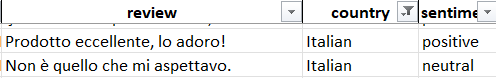


**Example multilingual-uncased**


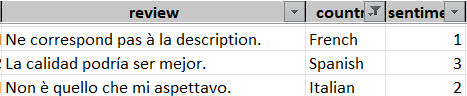


In [1]:
!pip install -q transformers
!pip install datasets transformers huggingface_hub
!apt-get install git-lfs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 13.4 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git-lfs is already the newest version (3.0.2-1ubuntu0.3).
0 upgrad

In [2]:
import pandas as pd
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px

# Load model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")
model = AutoModelForSequenceClassification.from_pretrained("nlptown/bert-base-multilingual-uncased-sentiment")

# Load the Excel file
data_path = "/content/Amazon Review Scraper.xlsx"
df_2 = pd.read_excel(data_path)

# Check if the 'review' column exists
if 'review' not in df_2.columns:
    raise ValueError("The uploaded file does not contain a 'Review' column.")

# Perform sentiment analysis
def analyze_sentiment(review):
    inputs = tokenizer.encode_plus(
        review,
        return_tensors="pt",
        truncation=True,
        padding=True,
        max_length=512
    )
    outputs = model(**inputs)
    scores = torch.nn.functional.softmax(outputs.logits, dim=1)
    predicted_class = torch.argmax(scores).item()
    return predicted_class + 1  # Ratings are 1-indexed

df_2['sentiment'] = df_2['review'].apply(analyze_sentiment)


# Save the results to a new Excel file
#df_2.to_excel("sentiment_analysis_results.xlsx", index=False)
df_2.head()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

,reviewID,name,date,verifiedPurchase,rating,helpful,title,review,profile,country,reviewLink,reviewImage,sentiment
0,R1173GG5JLQG09,Laura t.,"September 9, 2023",True,5.0,NaN,The little speaker that could....,Wow...this spear has so many pros and just a f...,https://www.amazon.com/gp/profile/amzn1.accoun...,United States,https://www.amazon.com/gp/customer-reviews/R11...,NaN,5
1,R11ZG1YPMM9S8E,Amazon Customer,"July 19, 2024",True,4.0,NaN,Great,Love it,https://www.amazon.com/gp/profile/amzn1.accoun...,United States,https://www.amazon.com/gp/customer-reviews/R11...,NaN,5
2,R12OFRDZ24T1VP,Precious Howard,"November 3, 2024",True,5.0,NaN,Quality sound,Great quality sound ! Easy to use with Bluetooth.,https://www.amazon.com/gp/profile/amzn1.accoun...,United States,https://www.amazon.com/gp/customer-reviews/R12...,NaN,5
3,R15S7I9J92EDFP,Tanya Lynette,"October 22, 2024",True,5.0,NaN,Love my Alexa,I use her everyday from when I get up until I ...,https://www.amazon.com/gp/profile/amzn1.accoun...,United States,https://www.amazon.com/gp/customer-reviews/R15...,NaN,5
4,R15SZF32E1SA97,Lovedecor,"November 30, 2021",True,4.0,NaN,Motion detector needs improvement,I'm writing this review in the hopes that the ...,https://www.amazon.com/gp/profile/amzn1.accoun...,United States,https://www.amazon.com/gp/customer-reviews/R15...,NaN,2


In [4]:
#generate a pie chart
fig = px.pie(df_2, names='sentiment', title='Sentiment Analysis Results')
fig.show()